# Dwave Simulation

## inspiration

https://docs.ocean.dwavesys.com/en/stable/docs_dnx/reference/algorithms/generated/dwave_networkx.maximum_independent_set.html#dwave_networkx.maximum_independent_set

https://cloud.dwavesys.com/learning/user/alicebarthe_40gmail_2ecom/notebooks/leap/demos/structural-imbalance/01-structural-imbalance-overview.ipynb

## Graph Class

In [1]:
import numpy as np
import random as rand
import networkx as nx
import time
import matplotlib.pyplot as plt

In [2]:
class GraphClass():
    def __init__(self, graph):
        self.graph = graph
        self.num_vertices = len(self.graph)
        self.occupations = np.random.rand(self.num_vertices) < 0.5
        self.edges = self.find_edges()
    
    def to_nx(self):
        I,J = np.where(np.triu(self.edges))
        G  = nx.Graph()
        G.add_edges_from(list(zip(I,J)))
        return G   
    
    def find_edges(self):
        G = np.array(graph)
        D = np.sqrt(np.square(G[:,0:1]-np.transpose(G[:,0:1])) + np.square(G[:,1:2]-np.transpose(G[:,1:2])))
        edges = (D<1)*(D!=0)
        return edges     
    
    def draw_graph(self,occupations = None):
        
        # inner function
        def draw_circles(ax,xs,ys,cs):

            # plot the non activated vertices in the background
            for x,y,c in zip(xs,ys,cs):
                if not(c):
                    circle = plt.Circle((x,y),0.5,color = 'gray',alpha=0.5 )
                    ax.add_patch(circle)

            # plot the activated vertices in the foreground        
            for x,y,c in zip(xs,ys,cs):
                if c:
                    circle = plt.Circle((x,y),0.5,color = 'b',alpha=0.3)
                    ax.add_patch(circle)
        
        #core of function
        graph_np = np.array(self.graph)
        xs = graph_np[:,0]
        ys = graph_np[:,1]
        
        if occupations==None:
            cs = self.occupations
            fig, ax = plt.subplots()
            draw_circles(ax,xs,ys,cs)
            ax.axis('equal')
        else:
            N = min(5,len(occupations))
            fig, axs = plt.subplots(1,N,figsize=(20,4))
            for i in range(N):
                cs = occupations[i]
                draw_circles(axs[i],xs,ys,cs)
                axs[i].axis('equal')
        
        return fig
        
    def brute_force(self):
        numVertice = self.num_vertices
        format_string = '0' + str(numVertice) + 'b'
        bitlist = []
        for n in range(2**numVertice):
            bitlist.append([int(x) for x in format(n, format_string)])
        A = np.array(bitlist)
        I,J = np.where(np.triu(self.edges))
        edge = np.zeros(2**numVertice)
        for i,j in zip(I,J):
            edge += A[:,i]*A[:,j]
        cost = np.sum(A,axis=1)*1.0 - edge * numVertice
        energy = np.max(cost)
        solutions = A[cost==energy,:]
        occupations = (solutions == 1).tolist()
        return energy,occupations

## Define Problem

In [3]:
import dwave_networkx as dnx

In [4]:
N = 20 #number of vertices
density = 1
scale = np.sqrt(N)/density
rand.seed(2021)
graph = [(rand.random()*scale,rand.random()*scale) for n in range(N)]
G = GraphClass(graph)

## Brute Force

In [5]:
tic = time.time()
energy, occupations = G.brute_force()
toc = time.time()

print(energy)
print(f"computation took {toc-tic:2f} seconds")

10.0
computation took 9.477855 seconds


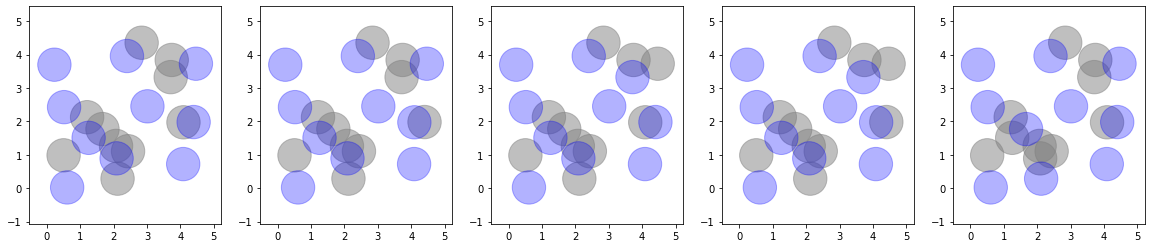

In [6]:
G.draw_graph(occupations);

## Simulated Quantum Annealing

In [49]:
import dimod

In [76]:
sampler = dimod.SimulatedAnnealingSampler()
G_nx = G.to_nx()

tic = time.time()
indep_nodes = dnx.maximum_independent_set(G_nx, sampler)
toc = time.time()

energy = len(indep_nodes)
print(energy)
print(f"computation took {toc-tic:2f} seconds")

10.0
computation took 0.690144 seconds


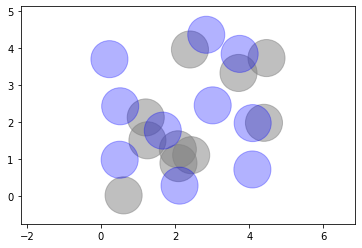

In [78]:
occupations = np.full(N, False, dtype=bool)
occupations[indep_nodes] = True
G.occupations = occupations
G.draw_graph();

## on Dwave Hardware

In [82]:
from dwave.system import DWaveSampler, EmbeddingComposite

In [83]:
sampler = EmbeddingComposite(DWaveSampler())
G_nx = G.to_nx()

tic = time.time()
indep_nodes = dnx.maximum_independent_set(G_nx, sampler)
toc = time.time()

energy = len(indep_nodes)
print(energy)
print(f"computation took {toc-tic:2f} seconds")

10
computation took 2.690441 seconds


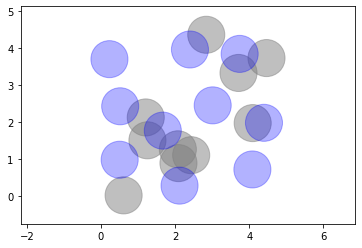

In [84]:
occupations = np.full(N, False, dtype=bool)
occupations[indep_nodes] = True
G.occupations = occupations
G.draw_graph();